# Step 1
#### -Importing
#### -Cleaning
#### -Filtering
#### -Missing Values
#### -Preprocessing, Merging

In [1]:
import pandas as pd

# import dataset
usd_raw = pd.read_csv("currentUSD.csv", sep=";")
gdp_raw = pd.read_csv("percentGDP.csv", sep=";")

print("USD shape:", usd_raw.shape)
print("GDP shape:", gdp_raw.shape)

USD shape: (266, 66)
GDP shape: (266, 66)


In [2]:
usd_raw.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,3.219951e+08,4.398005e+08,5.239918e+08,5.631079e+08,5.992006e+08,...,1.682935e+10,1.538332e+10,1.365941e+10,1.617268e+10,1.227049e+10,1.169172e+10,1.119335e+10,1.143168e+10,1.212065e+10,1.337060e+10
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.682388e+08,1.995171e+08,1.858783e+08,1.914071e+08,1.980747e+08,2.263062e+08,2.795770e+08,2.782508e+08,NaN,NaN
3,Africa Western and Central,AFW,NaN,6.573052e+07,9.002825e+07,1.005711e+08,1.188867e+08,1.456340e+08,1.507266e+08,2.794051e+08,...,6.451565e+09,5.016333e+09,5.575535e+09,5.510401e+09,6.325122e+09,6.166715e+09,7.186733e+09,9.697806e+09,8.472734e+09,9.463191e+09
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.846249e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,1.470939e+09,9.935944e+08,9.814510e+08,1.622764e+09,1.270158e+09


### PreProcessing and Cleaning

In [3]:
import pandas as pd

# --- Step 1: Drop unneeded metadata columns ---
usd_clean = usd_raw.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], errors='ignore')
gdp_clean = gdp_raw.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], errors='ignore')

# --- Step 2: Convert year columns to numeric ---
# Find all columns that are years (4-digit numbers)
year_cols_usd = [col for col in usd_clean.columns if col.isdigit()]
year_cols_gdp = [col for col in gdp_clean.columns if col.isdigit()]

# Convert values to numeric, force errors to NaN
usd_clean[year_cols_usd] = usd_clean[year_cols_usd].apply(pd.to_numeric, errors='coerce')
gdp_clean[year_cols_gdp] = gdp_clean[year_cols_gdp].apply(pd.to_numeric, errors='coerce')

# --- Step 3: Quick check ---
print("USD numeric check:\n", usd_clean[year_cols_usd].dtypes.unique())
print("GDP numeric check:\n", gdp_clean[year_cols_gdp].dtypes.unique())
print("USD shape:", usd_clean.shape)
print("GDP shape:", gdp_clean.shape)
print(usd_clean.head())
print(gdp_clean.head())

USD numeric check:
 [dtype('float64')]
GDP numeric check:
 [dtype('float64')]
USD shape: (266, 65)
GDP shape: (266, 65)
                  Country Name  1960          1961          1962  \
0                        Aruba   NaN           NaN           NaN   
1  Africa Eastern and Southern   NaN           NaN           NaN   
2                  Afghanistan   NaN           NaN           NaN   
3   Africa Western and Central   NaN  6.573052e+07  9.002825e+07   
4                       Angola   NaN           NaN           NaN   

           1963          1964          1965          1966          1967  \
0           NaN           NaN           NaN           NaN           NaN   
1  3.219951e+08  4.398005e+08  5.239918e+08  5.631079e+08  5.992006e+08   
2           NaN           NaN           NaN           NaN           NaN   
3  1.005711e+08  1.188867e+08  1.456340e+08  1.507266e+08  2.794051e+08   
4           NaN           NaN           NaN           NaN           NaN   

           1968  ...

### Filtering countries of Interest

In [5]:
# --- STEP: Filter Relevant Countries for Defense Study ---

# Target list (major powers + key regional actors)
target_countries = [
    "United States",        # Global leader
    "Russian Federation",   # Main rival (post-1991)
    "China",                # Rising challenger
    "United Kingdom",
    "France",
    "Germany",
    "Japan",
    "India",
    "Korea, Rep.",          # South Korea
    "Saudi Arabia",
    "Iran, Islamic Rep.",
    "Turkiye",
    "Australia",
    "Poland"
]

# Keep only those countries
usd_df = usd_raw[usd_raw["Country Name"].isin(target_countries)].copy()
gdp_df = gdp_raw[gdp_raw["Country Name"].isin(target_countries)].copy()

# Ensure year columns are numeric
year_cols_usd = [c for c in usd_df.columns if c.isdigit()]
year_cols_gdp = [c for c in gdp_df.columns if c.isdigit()]

usd_df[year_cols_usd] = usd_df[year_cols_usd].apply(pd.to_numeric, errors="coerce")
gdp_df[year_cols_gdp] = gdp_df[year_cols_gdp].apply(pd.to_numeric, errors="coerce")

print("Filtered USD shape:", usd_df.shape)
print("Filtered GDP shape:", gdp_df.shape)
print("\nCountries included:\n", sorted(usd_df["Country Name"].unique()))

Filtered USD shape: (14, 66)
Filtered GDP shape: (14, 66)

Countries included:
 ['Australia', 'China', 'France', 'Germany', 'India', 'Iran, Islamic Rep.', 'Japan', 'Korea, Rep.', 'Poland', 'Russian Federation', 'Saudi Arabia', 'Turkiye', 'United Kingdom', 'United States']


### Missing values

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Check missing values ---
usd_missing = usd_df.set_index("Country Name").isna().sum(axis=1)
gdp_missing = gdp_df.set_index("Country Name").isna().sum(axis=1)

print("Missing values (USD):")
print(usd_missing)
print("\nMissing values (GDP):")
print(gdp_missing)

Missing values (USD):
Country Name
Australia              0
China                 29
Germany                0
France                 0
United Kingdom         0
India                  0
Iran, Islamic Rep.     0
Japan                  0
Korea, Rep.            0
Poland                 0
Russian Federation    28
Saudi Arabia           4
Turkiye                0
United States          0
dtype: int64

Missing values (GDP):
Country Name
Australia              0
China                 29
Germany                0
France                 0
United Kingdom         0
India                  0
Iran, Islamic Rep.     0
Japan                  0
Korea, Rep.            0
Poland                20
Russian Federation    32
Saudi Arabia           7
Turkiye                0
United States          0
dtype: int64


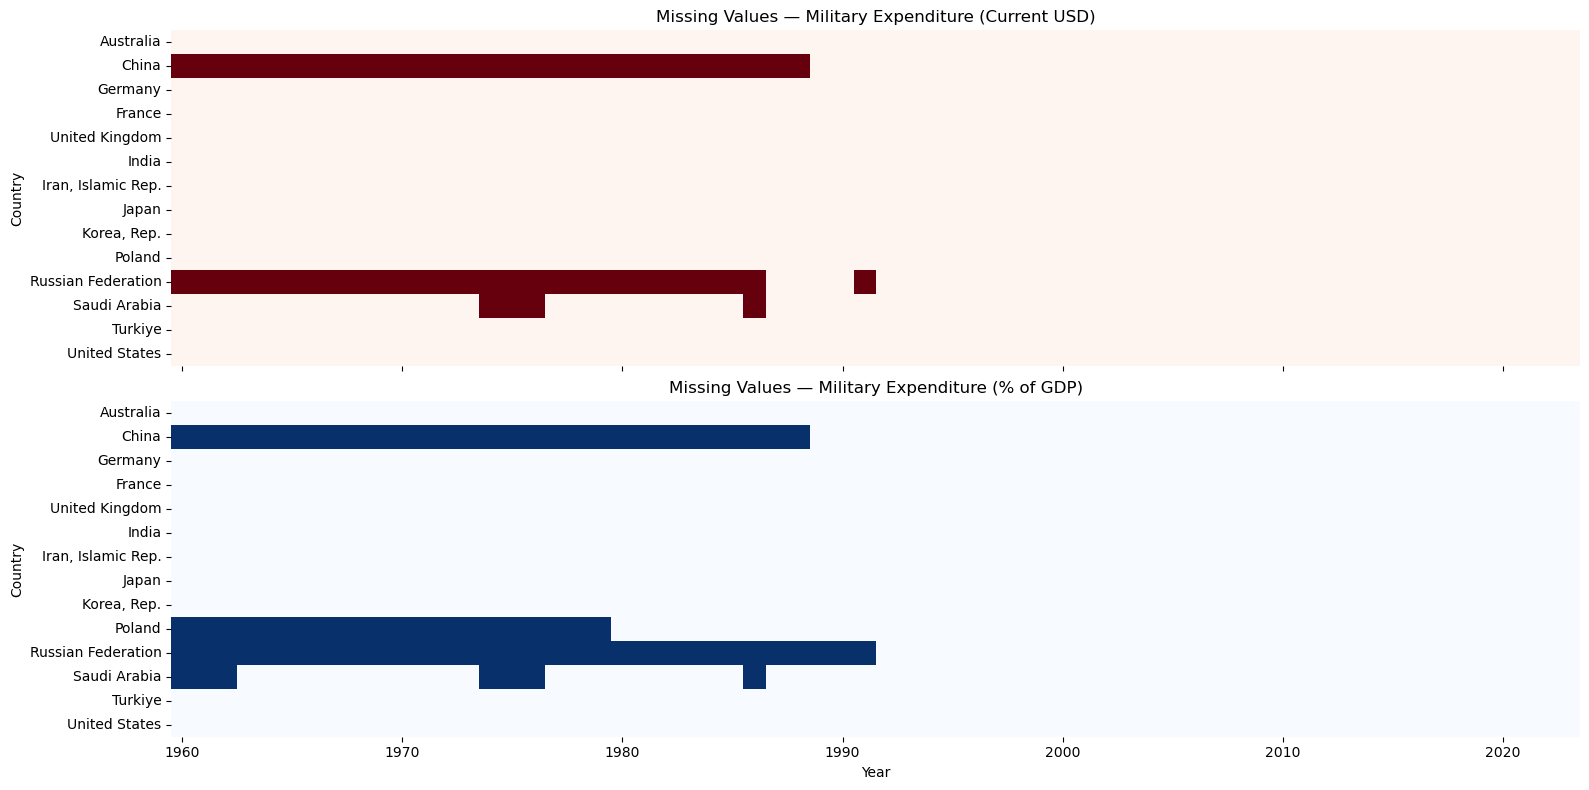

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Identify year columns ---
year_cols_usd = [c for c in usd_df.columns if c.isdigit()]
year_cols_gdp = [c for c in gdp_df.columns if c.isdigit()]

# --- Build missing-value matrices ---
usd_missing = usd_df.set_index("Country Name")[year_cols_usd].isna()
gdp_missing = gdp_df.set_index("Country Name")[year_cols_gdp].isna()

# --- Convert to numeric for plotting ---
usd_missing = usd_missing.astype(int)
gdp_missing = gdp_missing.astype(int)

# --- Plot ---
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

sns.heatmap(
    usd_missing, cmap="Reds", cbar=False, ax=axes[0],
    yticklabels=True, xticklabels=10,
)
axes[0].set_title("Missing Values — Military Expenditure (Current USD)")
axes[0].set_ylabel("Country")

sns.heatmap(
    gdp_missing, cmap="Blues", cbar=False, ax=axes[1],
    yticklabels=True, xticklabels=10,
)
axes[1].set_title("Missing Values — Military Expenditure (% of GDP)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Country")

plt.tight_layout()
plt.show()

In [8]:
# Identify the year columns
year_cols_usd = [c for c in usd_df.columns if c.isdigit()]
year_cols_gdp = [c for c in gdp_df.columns if c.isdigit()]

# Extract Russia rows
rus_usd = usd_df[usd_df["Country Name"] == "Russian Federation"][year_cols_usd].iloc[0]
rus_gdp = gdp_df[gdp_df["Country Name"] == "Russian Federation"][year_cols_gdp].iloc[0]

# Find last missing year
last_missing_usd = rus_usd[pd.isna(rus_usd)].index.max()
last_missing_gdp = rus_gdp[pd.isna(rus_gdp)].index.max()

print(f"Last missing year (USD): {last_missing_usd}")
print(f"Last missing year (GDP): {last_missing_gdp}")

Last missing year (USD): 1991
Last missing year (GDP): 1991


In [26]:
# --- Step: Filter for analysis period (1991–2023) ---

start_year, end_year = 1993, 2023

# Identify year columns
year_cols_usd = [int(c) for c in usd_df.columns if c.isdigit()]
year_cols_gdp = [int(c) for c in gdp_df.columns if c.isdigit()]

# Keep only relevant years
year_cols_usd = [str(y) for y in year_cols_usd if start_year <= y <= end_year]
year_cols_gdp = [str(y) for y in year_cols_gdp if start_year <= y <= end_year]

usd_filtered = usd_df[["Country Name"] + year_cols_usd].copy()
gdp_filtered = gdp_df[["Country Name"] + year_cols_gdp].copy()

print("USD shape after filtering:", usd_filtered.shape)
print("GDP shape after filtering:", gdp_filtered.shape)
print("Years retained:", year_cols_usd[:3], "...", year_cols_usd[-3:])

USD shape after filtering: (14, 32)
GDP shape after filtering: (14, 32)
Years retained: ['1993', '1994', '1995'] ... ['2021', '2022', '2023']


In [27]:
usd_filtered.head()

,Country Name,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
13,Australia,6.733829e+09,7.459697e+09,7.665878e+09,8.202777e+09,7.936885e+09,7.107543e+09,7.770251e+09,7.273760e+09,7.043146e+09,...,2.578371e+10,2.404621e+10,2.638295e+10,2.769111e+10,2.683982e+10,2.607935e+10,2.730089e+10,3.271807e+10,3.244533e+10,3.234001e+10
40,China,1.236023e+10,9.867120e+09,1.238513e+10,1.427540e+10,1.569959e+10,1.703178e+10,2.047392e+10,2.223714e+10,2.656146e+10,...,1.821092e+11,1.965388e+11,1.985384e+11,2.104430e+11,2.325306e+11,2.403326e+11,2.579734e+11,2.859305e+11,2.919584e+11,2.964386e+11
55,Germany,3.503054e+10,3.419771e+10,3.874270e+10,3.670119e+10,3.126771e+10,3.120077e+10,3.069016e+10,2.649759e+10,2.581540e+10,...,4.466283e+10,3.817002e+10,3.990968e+10,4.228111e+10,4.649768e+10,4.907944e+10,5.331871e+10,5.651313e+10,5.615312e+10,6.682663e+10
77,France,3.577527e+10,3.728861e+10,4.012402e+10,3.897773e+10,3.469790e+10,3.363356e+10,3.267271e+10,2.840314e+10,2.795157e+10,...,5.313475e+10,4.564747e+10,4.737059e+10,4.919566e+10,5.140981e+10,5.011893e+10,5.274706e+10,5.664700e+10,5.363875e+10,6.130129e+10
81,United Kingdom,3.811321e+10,3.856901e+10,3.829428e+10,3.856613e+10,3.988995e+10,4.122213e+10,4.076040e+10,3.934371e+10,3.951258e+10,...,6.699547e+10,5.999021e+10,5.332737e+10,5.207501e+10,5.583292e+10,5.656760e+10,5.833237e+10,6.513622e+10,6.408163e+10,7.494284e+10


In [28]:
gdp_filtered.head()

,Country Name,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
13,Australia,2.178030,2.116599,2.021313,1.930440,1.867334,1.871122,1.889236,1.829842,1.870094,...,1.773058,1.953634,2.088530,2.004233,1.895688,1.880960,2.010656,1.990278,1.908336,1.922199
40,China,1.928067,1.693480,1.686234,1.652727,1.632651,1.655081,1.871466,1.835760,1.983086,...,1.738409,1.776771,1.768887,1.711243,1.673578,1.682911,1.756699,1.605260,1.623146,1.665339
55,Germany,1.693538,1.550276,1.495022,1.465858,1.409302,1.390895,1.395074,1.358883,1.323438,...,1.149942,1.137338,1.151230,1.153404,1.170549,1.261841,1.374272,1.321027,1.377138,1.519652
77,France,2.689535,2.660375,2.492496,2.414474,2.375410,2.226208,2.177843,2.085018,2.030695,...,1.862961,1.872258,1.917282,1.908642,1.843009,1.836461,1.996478,1.914406,1.932424,2.056387
81,United Kingdom,3.590650,3.381934,2.854199,2.724592,2.560149,2.495962,2.422910,2.372797,2.411122,...,2.184485,2.048908,1.984491,1.950029,1.944556,1.985254,2.162216,2.073222,2.073926,2.264879


### Merging both datasets into one dataset

In [32]:
import numpy as np
import pandas as pd

# Assumes you already have:
#   usd_filtered  -> columns: ["Country Name", "1991", ..., "2023"]
#   gdp_filtered  -> columns: ["Country Name", "1991", ..., "2023"]

# --- 1) Align on common years ---
years_usd = [c for c in usd_filtered.columns if c.isdigit()]
years_gdp = [c for c in gdp_filtered.columns if c.isdigit()]
years = sorted(set(years_usd).intersection(set(years_gdp)), key=int)

usd_w = usd_filtered[["Country Name"] + years].copy()
gdp_w = gdp_filtered[["Country Name"] + years].copy()

# --- 2) ONE WIDE DATASET (suffix columns) ---
usd_w_ren = usd_w.rename(columns={y: f"{y}_usd" for y in years})
gdp_w_ren = gdp_w.rename(columns={y: f"{y}_gdp" for y in years})

combined_wide = (
    usd_w_ren.merge(gdp_w_ren, on="Country Name", how="inner")
             .rename(columns={"Country Name": "country"})
)

# --- 3) ONE LONG (TIDY) DATASET ---
usd_long = usd_w.melt(id_vars="Country Name", value_vars=years,
                      var_name="year", value_name="mil_usd")
gdp_long = gdp_w.melt(id_vars="Country Name", value_vars=years,
                      var_name="year", value_name="mil_gdp_share")

combined_long = (
    usd_long.merge(gdp_long, on=["Country Name","year"], how="inner")
            .rename(columns={"Country Name":"country"})
            .assign(year=lambda d: d["year"].astype(int))
)

# --- 4) Log of USD (only if positive) ---
combined_long["log_mil_usd"] = np.where(
    combined_long["mil_usd"] > 0,
    np.log(combined_long["mil_usd"]),
    np.nan
)

# --- 5) Save ---
combined_wide.to_csv("combined_1993_2023_wide.csv", index=False)
combined_long.to_csv("combined_1993_2023_long.csv", index=False)

print("Saved:")
print(" - combined_1993_2023_wide.csv  (years with _usd / _gdp)")
print(" - combined_1993_2023_long.csv  (country, year, mil_usd, mil_gdp_share, log_mil_usd)")
print("Wide shape:", combined_wide.shape, "| Long shape:", combined_long.shape)

Saved:
 - combined_1993_2023_wide.csv  (years with _usd / _gdp)
 - combined_1993_2023_long.csv  (country, year, mil_usd, mil_gdp_share, log_mil_usd)
Wide shape: (14, 63) | Long shape: (434, 5)


In [33]:
combined_wide

,country,1993_usd,1994_usd,1995_usd,1996_usd,1997_usd,1998_usd,1999_usd,2000_usd,2001_usd,...,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2019_gdp,2020_gdp,2021_gdp,2022_gdp,2023_gdp
0,Australia,6.733829e+09,7.459697e+09,7.665878e+09,8.202777e+09,7.936885e+09,7.107543e+09,7.770251e+09,7.273760e+09,7.043146e+09,...,1.773058,1.953634,2.088530,2.004233,1.895688,1.880960,2.010656,1.990278,1.908336,1.922199
1,China,1.236023e+10,9.867120e+09,1.238513e+10,1.427540e+10,1.569959e+10,1.703178e+10,2.047392e+10,2.223714e+10,2.656146e+10,...,1.738409,1.776771,1.768887,1.711243,1.673578,1.682911,1.756699,1.605260,1.623146,1.665339
2,Germany,3.503054e+10,3.419771e+10,3.874270e+10,3.670119e+10,3.126771e+10,3.120077e+10,3.069016e+10,2.649759e+10,2.581540e+10,...,1.149942,1.137338,1.151230,1.153404,1.170549,1.261841,1.374272,1.321027,1.377138,1.519652
3,France,3.577527e+10,3.728861e+10,4.012402e+10,3.897773e+10,3.469790e+10,3.363356e+10,3.267271e+10,2.840314e+10,2.795157e+10,...,1.862961,1.872258,1.917282,1.908642,1.843009,1.836461,1.996478,1.914406,1.932424,2.056387
4,United Kingdom,3.811321e+10,3.856901e+10,3.829428e+10,3.856613e+10,3.988995e+10,4.122213e+10,4.076040e+10,3.934371e+10,3.951258e+10,...,2.184485,2.048908,1.984491,1.950029,1.944556,1.985254,2.162216,2.073222,2.073926,2.264879
5,India,8.253543e+09,8.880551e+09,9.754465e+09,9.904673e+09,1.146488e+10,1.192061e+10,1.389556e+10,1.428751e+10,1.460064e+10,...,2.543982,2.457450,2.543152,2.531511,2.424285,2.545998,2.807194,2.480389,2.363927,2.443051
6,"Iran, Islamic Rep.",1.448178e+09,1.703172e+09,2.501544e+09,3.550987e+09,4.642385e+09,5.479363e+09,6.650285e+09,8.327054e+09,1.037879e+10,...,2.116557,2.557091,2.796436,2.844338,2.243434,2.110689,2.167920,2.216288,2.111552,2.061404
7,Japan,4.135394e+10,4.528559e+10,4.996167e+10,4.404710e+10,4.063484e+10,3.784901e+10,4.312290e+10,4.550967e+10,4.075797e+10,...,0.957801,0.947284,0.929517,0.913229,0.962497,0.992231,1.017448,1.017011,1.105886,1.196070
8,"Korea, Rep.",1.237742e+10,1.351927e+10,1.608510e+10,1.640867e+10,1.484848e+10,1.045796e+10,1.209519e+10,1.380111e+10,1.294185e+10,...,2.529936,2.494981,2.459578,2.421489,2.496844,2.671299,2.803322,2.797473,2.769508,2.812046
9,Poland,2.123378e+09,2.251923e+09,2.719363e+09,3.083417e+09,3.192276e+09,3.491023e+09,3.226555e+09,3.146107e+09,3.630646e+09,...,1.919037,2.140546,1.949218,1.901660,2.044800,1.975095,2.287485,2.242624,2.228561,3.832729


In [34]:
combined_long

,country,year,mil_usd,mil_gdp_share,log_mil_usd
0,Australia,1993,6.733829e+09,2.178030,22.630410
1,China,1993,1.236023e+10,1.928067,23.237750
2,Germany,1993,3.503054e+10,1.693538,24.279486
3,France,1993,3.577527e+10,2.689535,24.300523
4,United Kingdom,1993,3.811321e+10,3.590650,24.363827
...,...,...,...,...,...
429,Poland,2023,3.164987e+10,3.832729,24.178000
430,Russian Federation,2023,1.094544e+11,5.864189,25.418774
431,Saudi Arabia,2023,7.581333e+10,7.086386,25.051540
432,Turkiye,2023,1.582785e+10,1.502665,23.485037
